In [13]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import statsmodels.api as sm
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import metrics
import scipy.stats
import os
import copy
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [3]:
temp=pd.read_excel("C:\\Users\\Lyndon_Wang\\Desktop\\1005 dataset.xlsx",sheet_name="Coursera Course Dataset")

visualize the relationship between course_rating, number_of_students_enrolled, and course_difficulty

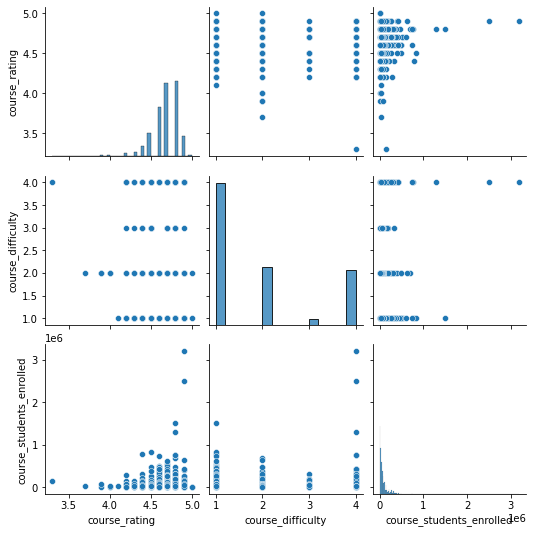

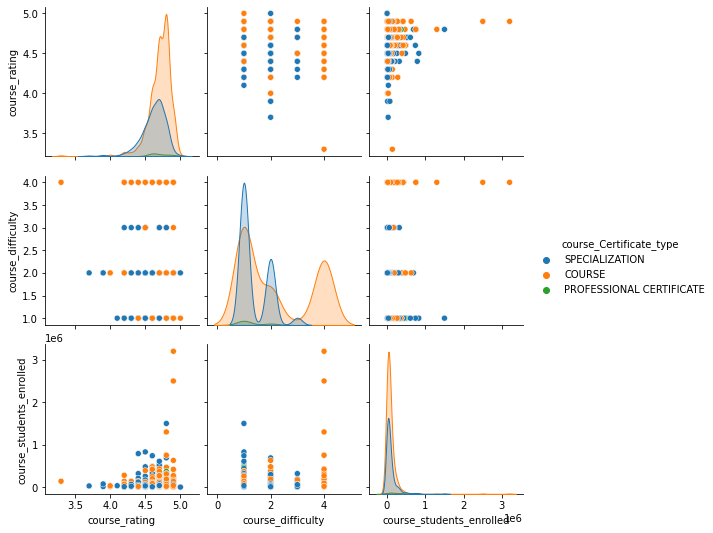

In [4]:
#df.drop['']
temp2=copy.deepcopy(temp)
temp2=temp2.replace(to_replace=r'Beginner',value=1,regex=True)
temp2=temp2.replace(to_replace=r'Intermediate',value=2,regex=True)
temp2=temp2.replace(to_replace=r'Mixed',value=4,regex=True)
temp2=temp2.replace(to_replace=r'Advanced',value=3,regex=True)

sns.pairplot(temp2)
sns.pairplot(temp2,hue='course_Certificate_type')

check outliers

In [5]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    
    if len(outliers) == 0:
        return 'No Outliers'
    else:
        return outliers


# Outliers values are --
temp1=copy.deepcopy(temp2)
temp1.drop(columns=temp1.columns[[0,1,2]],inplace=True)
for col in temp1:
    print('-' * 27, col,'-' * 26)
    a=copy.deepcopy(detect_outliers(temp1, col))
    outliers_index=list(a.index)
    print(a)
    print('\n')
temp2.drop(index=outliers_index,inplace=True)
print(temp2)

--------------------------- course_rating --------------------------
     course_rating  course_difficulty  course_students_enrolled
59             4.2                  1                      6600
182            4.2                  1                    140000
331            4.2                  2                     27000
402            4.2                  2                      7400
413            3.3                  4                    140000
414            4.1                  1                     34000
445            4.2                  4                     12000
515            4.2                  4                     76000
522            4.0                  2                     13000
566            3.7                  2                     29000
569            3.9                  2                     15000
590            4.2                  4                    280000
598            4.0                  2                     33000
640            4.2                 

visualize the relationship between course_rating, number_of_students_enrolled, and course_difficulty after removing the outliers

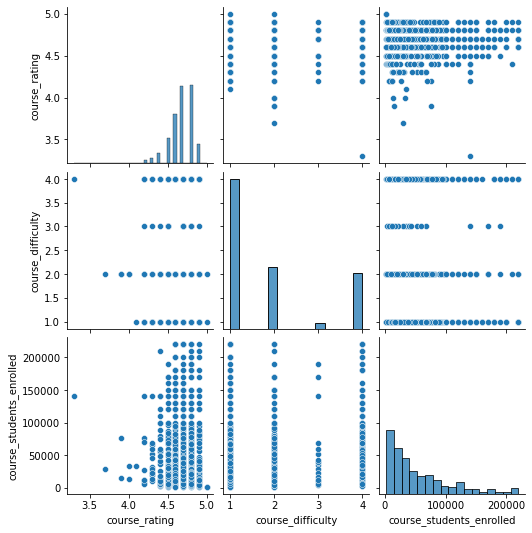

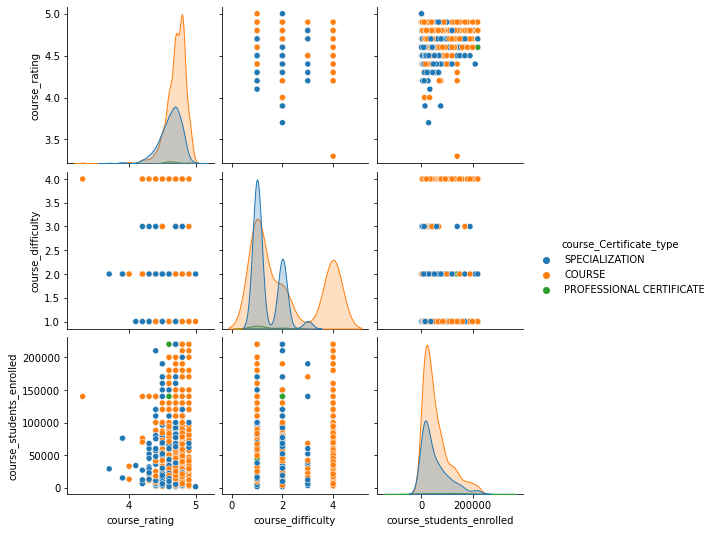

In [6]:
sns.pairplot(temp2)
sns.pairplot(temp2,hue='course_Certificate_type')

Weight the organizations

In [7]:
course_count=copy.deepcopy(temp2["course_organization"].value_counts())
org_list=temp2.loc[:,'course_organization']
org_list=list(org_list)
all_course_organization=[]

for i in range(0,len(org_list)):
    counter=False
    for j in range(0,len(all_course_organization)):
        if all_course_organization[j]==org_list[i]:
            counter=True
    if counter==False:
        all_course_organization.append(org_list[i])
total_people_enrolled_list=[]
num_enrolled=temp2.loc[:,'course_students_enrolled']
num_enrolled=list(num_enrolled)
for i in range(0,len(all_course_organization)):
    total_people_enrolled=temp2[temp2['course_organization']==all_course_organization[i]]['course_students_enrolled']
    total_people_enrolled_list.append(total_people_enrolled.sum(axis = 0, skipna = True))
number_of_course_of_org_list=[]

for i in range(0,len(all_course_organization)):
    number_of_course_of_org_list.append(len(temp2[temp2['course_organization']==all_course_organization[i]]['course_organization']))

mean_stu_of_org=[]
for i in range(0,len(number_of_course_of_org_list)):
    mean_stu_of_org.append(total_people_enrolled_list[i]/number_of_course_of_org_list[i])

mean_rating_of_org=[]
for i in range(0,len(all_course_organization)):
    temp=copy.deepcopy(temp2[temp2['course_organization']==all_course_organization[i]]['course_rating'])
    mean_rating_of_org.append(temp.mean())
#give all the organization a weight(by its average enrolled_students and its average rating)
weight_of_org=[]
for i in range(0,len(all_course_organization)):
    weight_of_org.append(mean_stu_of_org[i]*mean_rating_of_org[i]/10000)

temp3=copy.deepcopy(temp2)
for i in range(0, len(all_course_organization)):
    temp3=temp3.replace(to_replace=all_course_organization[i],value=weight_of_org[i],regex=False)

Use linear regression to predict the number of students enrolled by course_difficulty, course_rating and weight of the organization

In [39]:
temp3 = temp3[temp3['course_students_enrolled'].notna()]
# Specify target and input features
X = temp3[["course_organization","course_rating","course_difficulty"]]
Y = temp3['course_students_enrolled'].values

# Implement the model 
model = LinearRegression()
# Train the model 
model.fit(X,Y)

LinearRegression()

In [40]:
temp=-1
course_host=input()
predicted_course_rating=float(input())
predicted_course_difficulty=int(input())
for i in range(0,len(all_course_organization)):
    if course_host==all_course_organization[i]:
        temp=i
if temp==-1:
    predicted_course_host_rating=sum(weight_of_org)/len(weight_of_org)
else:
    predicted_course_host_rating=weight_of_org[temp]

xnew = np.array([[predicted_course_host_rating,predicted_course_rating,predicted_course_difficulty]])
y_pred = model.predict(xnew)
print('predicted enrolled students:', y_pred)

predicted enrolled students: [73219.65923508]


In [10]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('coefficients:',coeff_df)
print('intercept:', model.intercept_)
r_sq = model.score(X,Y)
print('R2: ', r_sq)

coefficients:                      Coefficient
course_organization  2097.073236
course_rating       -8150.149948
course_difficulty    3406.002188
intercept: 32710.474526647537
R2:  0.22175547851615518


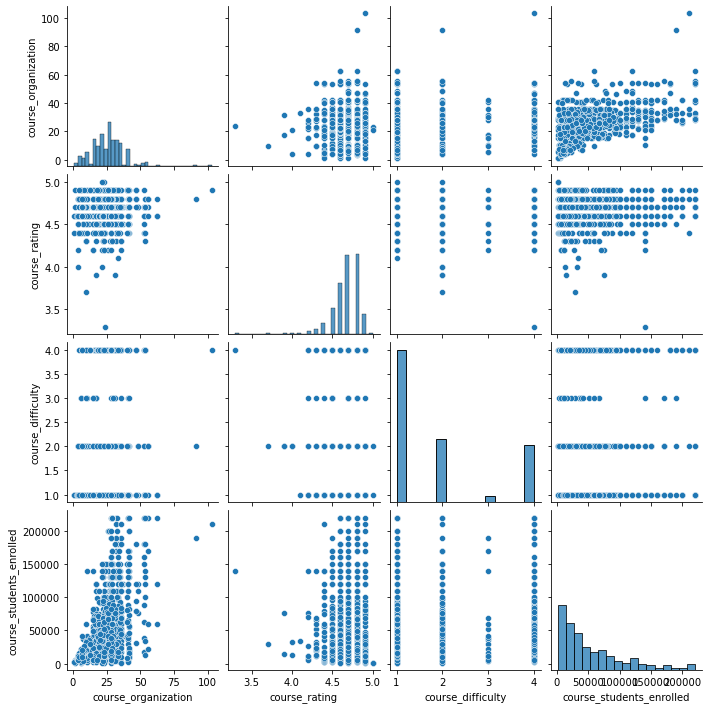

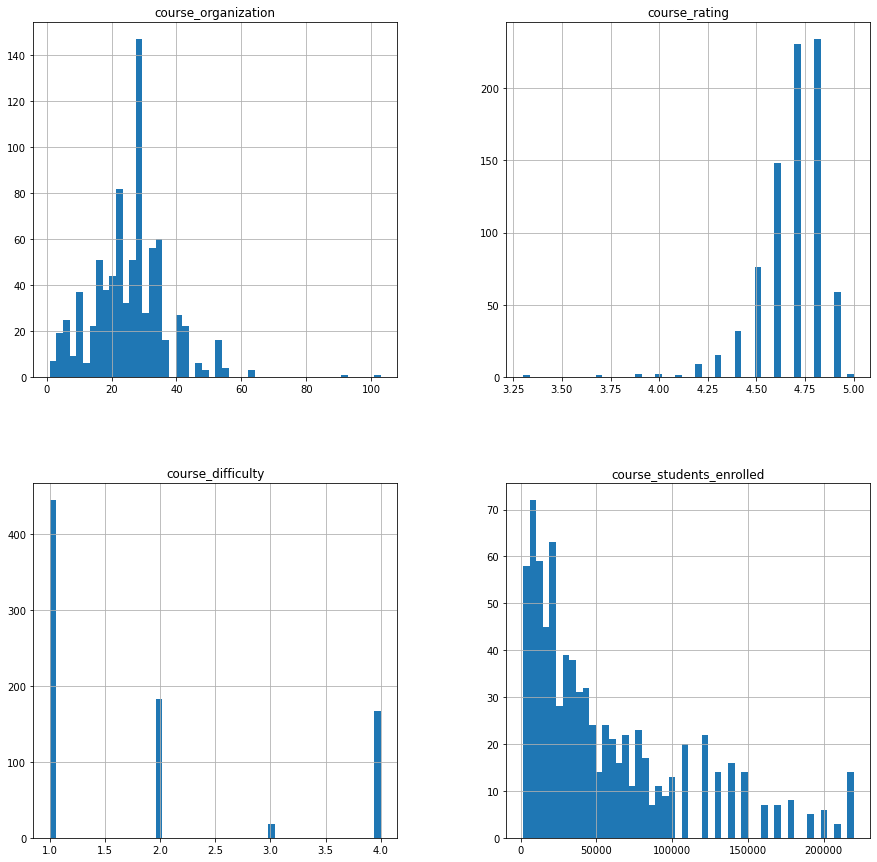

In [12]:
sns.pairplot(temp3)
temp3.hist(bins=50, figsize=(15,15))
plt.show()

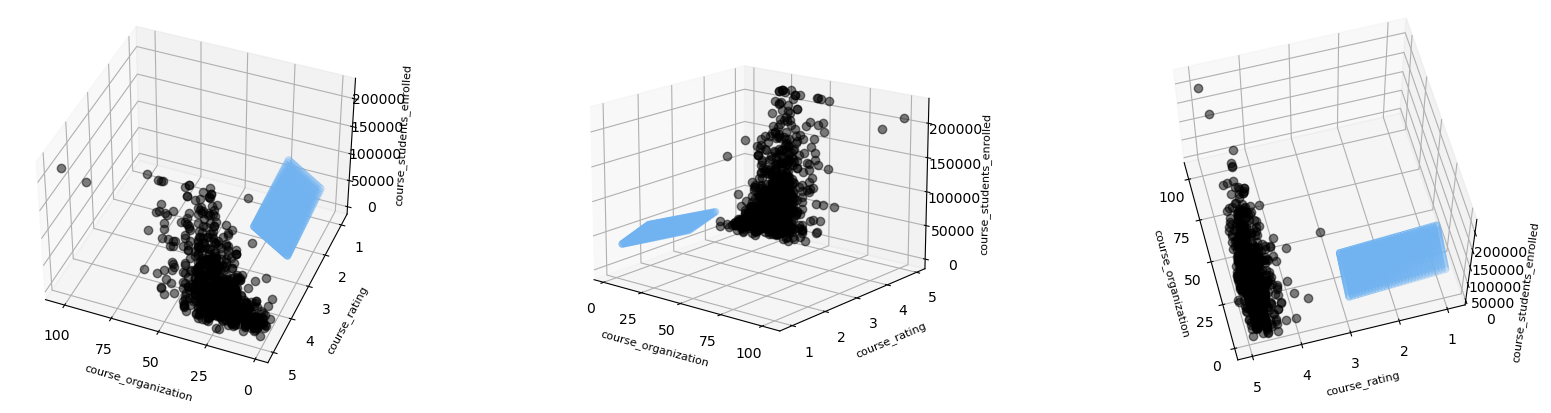

In [41]:

X = temp3[['course_organization', 'course_rating']].values.reshape(-1,2)
Y = temp3['course_students_enrolled']
######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(18, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('course_organization', fontsize=8)
    ax.set_ylabel('course_rating', fontsize=8)
    ax.set_zlabel('course_students_enrolled', fontsize=8)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=40, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

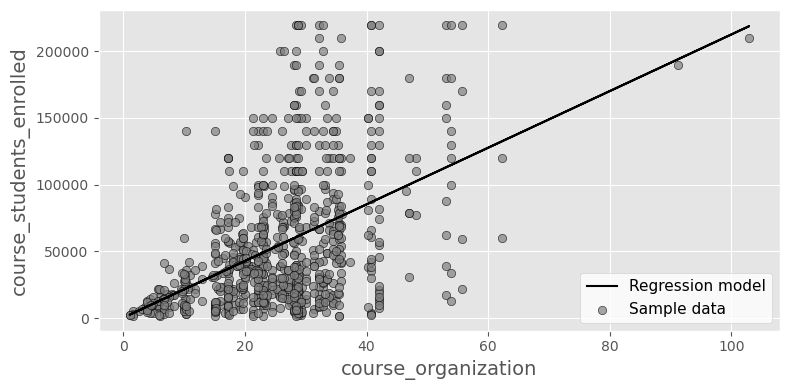

In [43]:
X = temp3['course_organization'].values.reshape(-1,1)
y = temp3['course_students_enrolled'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('course_students_enrolled', fontsize=14)
ax.set_xlabel('course_organization', fontsize=14)

ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

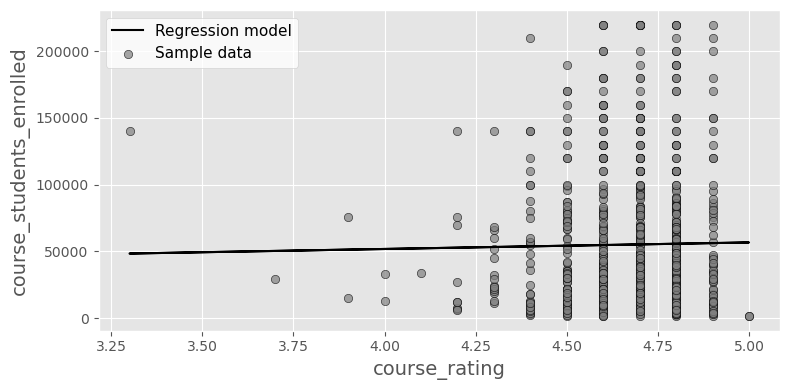

In [45]:
X = temp3['course_rating'].values.reshape(-1,1)
y = temp3['course_students_enrolled'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('course_students_enrolled', fontsize=14)
ax.set_xlabel('course_rating', fontsize=14)

ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

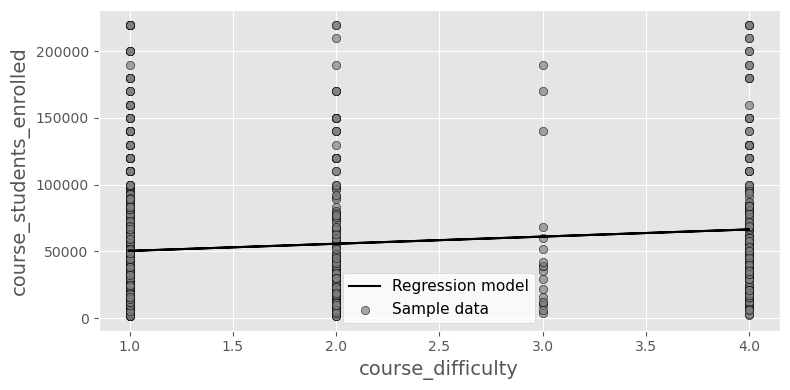

In [46]:
X = temp3["course_difficulty"].values.reshape(-1,1)
y = temp3['course_students_enrolled'].values

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('course_students_enrolled', fontsize=14)
ax.set_xlabel("course_difficulty", fontsize=14)

ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

Business insights:
I first give all the organizations in that database a weight by analyzing their previous course information(average number of enrolled students per course and the average rating). Then apply these parameters to the linear regression model. In order to predict the number of students that may enroll in this course, the company just needs to type in the host organization, the expected rating of the course, and the difficulty level of the course. The platform may predict the approximate number of students and help to make decisions. 